# Aprendizado Profundo - UFMG

## Preâmbulo

O código abaixo consiste dos imports comuns. Além do mais, configuramos as imagens para ficar de um tamanho aceitável e criamos algumas funções auxiliares. No geral, você pode ignorar a próxima célula.

O curso nosso vai fazer uso extensivo de [mxnet](http://mxnet.apache.org). Importamos o mesmo com as seguintes linhas:

```python
import mxnet as mx
import mxnet.ndarray as nd```

Para instalar no collab, descomente e execute a célula abaixo.

In [ ]:
# !pip install mxnet-cu100==1.4.1

In [1]:
# -*- coding: utf8

import matplotlib.pyplot as plt

import mxnet as mx
import mxnet.ndarray as nd

import numpy as np

import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

Para testar o resultado dos seus algoritmos vamos usar o módulo testing do numpy.

In [3]:
from numpy.testing import assert_equal
from numpy.testing import assert_almost_equal
from numpy.testing import assert_array_almost_equal

## Aula 01 - Programação Diferenciável e Tensores

Quando pensamos no lado prático do aprendizado profundo, um aspecto chave que ajuda na implementação de novos algoritmos é a chamada programação diferenciável. Na próxima aula vamos voltar na mesma. No momento, o importante é salientar que a programação diferenciável faz uso extensivo de Tensores. Um [Tensor](http://en.wikipedia.org/wiki/Tensor) é uma generalização de matrizes para mais dimensões. Quando falamos de tensores, temos três casos especiais e um genérico que engloba os outros três:

1. **Escalar:** Um tensor de zero dimensões

In [4]:
1

1

1. **Vetor:** Um tensor de uma dimensão

In [5]:
np.array([1, 2])

array([1, 2])

1. **Matrizes:** Um tensor de duas dimensões

In [6]:
np.array([[1, 2], [2, 2]])

array([[1, 2],
       [2, 2]])

1. **Tensores**. Caso geral, representam n-dimensões. Na figura temos um tensor 3x3x3.

![](./figs/tensor.png)

No exemplo abaixo, temos um tensor 3x2x2. Note ao selecionar elementos da primeira dimensão ficamos com matrizes 2x2. 

In [7]:
X = np.random.randn(3, 2, 2) # Gera números aleatórios de uma normal
X[0]

array([[-0.6358628 , -0.6811978 ],
       [ 0.97055646, -1.62070286]])

In [8]:
X[1]

array([[ 0.33604874, -1.23591264],
       [ 0.5837484 , -0.91871322]])

In [9]:
X[2]

array([[-1.22966856,  1.78399218],
       [-1.15584646, -1.0437747 ]])

## Indexando

Sendo X uma matriz:

In [10]:
X = np.array([[1, 2], [2, 2]])
X

array([[1, 2],
       [2, 2]])

`X[l]` pega uma linha

In [11]:
X[0]

array([1, 2])

`X[:, c]` pega uma coluna

In [12]:
X[:, 0]

array([1, 2])

`X[um_vetor]` pega as linhas do vetor. `X[:, um_vetor]` pega as colunas

In [13]:
X = np.array([[1, 2, 3], [2, 2, 2]])
X[:, [1, 2]]

array([[2, 3],
       [2, 2]])

`X[vetor_booleano]` Retorna as linhas (ou colunas quando `X[:, vetor_booleano]`) onde o vetor é true

In [14]:
X[[False, True]]

array([[2, 2, 2]])

## Shape, Reshape e Ravel

Todo vetor, matriz e tensor pode ser redimensionado. Observe como no tensor abaixo temos `3x2x2=12` elementos. Podemos redimensionar os mesmos para outros arrays de tamanho 12.

In [15]:
X = np.random.randn(3, 2, 2)
X.shape

(3, 2, 2)

Como matriz

In [16]:
X.reshape((2, 6))

array([[-1.97650519, -0.58996957,  0.77738289, -0.57605672, -0.40006037,
        -1.01517283],
       [ 0.68585805, -1.30273627,  0.18669748,  0.97008602, -0.21000139,
         2.13821308]])

Outra Matriz

In [17]:
X.reshape((6, 2))

array([[-1.97650519, -0.58996957],
       [ 0.77738289, -0.57605672],
       [-0.40006037, -1.01517283],
       [ 0.68585805, -1.30273627],
       [ 0.18669748,  0.97008602],
       [-0.21000139,  2.13821308]])

Um Tensor

In [18]:
X.reshape((6, 2, 1))

array([[[-1.97650519],
        [-0.58996957]],

       [[ 0.77738289],
        [-0.57605672]],

       [[-0.40006037],
        [-1.01517283]],

       [[ 0.68585805],
        [-1.30273627]],

       [[ 0.18669748],
        [ 0.97008602]],

       [[-0.21000139],
        [ 2.13821308]]])

As operações flatten e ravel organizam os elementos como um vetor.

In [19]:
X.flatten()

array([-1.97650519, -0.58996957,  0.77738289, -0.57605672, -0.40006037,
       -1.01517283,  0.68585805, -1.30273627,  0.18669748,  0.97008602,
       -0.21000139,  2.13821308])

In [20]:
X.ravel()

array([-1.97650519, -0.58996957,  0.77738289, -0.57605672, -0.40006037,
       -1.01517283,  0.68585805, -1.30273627,  0.18669748,  0.97008602,
       -0.21000139,  2.13821308])

## Arrays Assíncronos

Em todos os exemplos abaixo vamos fazer uso pesado de matrizes e tensores. A biblioteca mxnet, contém uma biblioteca de tensores que é **quase igual** a biblioteca numpy. Observe como usando:

```python
import mxnet.ndarray as nd
```

Temos as mesmas primitivas de um vetor numpy. Portanto vamos fazer uso do módulo ND em boa parte das nossas tarefas.

In [21]:
np.array([[1, 2], [2, 1]])

array([[1, 2],
       [2, 1]])

In [22]:
nd.array([[1, 2], [2, 1]])


[[ 1.  2.]
 [ 2.  1.]]
<NDArray 2x2 @cpu(0)>

Uma diferença, é que o mxnet executa operações de forma assíncrona. Isto é uma característica comum de diversos arcabouços de aprendizado profundo. Então, diferente de numpy onde cada resultado já está pronto logo ao realizar a operação:

In [23]:
import time

tic = time.time()
X = np.random.normal(size=(10000, 1000))
Y = np.random.normal(size=(1000, 20000))
R = np.dot(X, Y)  # produto de matrizes
time.time() - tic

19.23804783821106

Em mxnet só temos a resposta ao ler o valor de retorno. A multiplicação `R = X @ Y` não é realizada ao executar a linha. Observe como o código termina muito muito rápido!

In [24]:
tic = time.time()
X = nd.random.normal(shape=(10000, 1000)) #shape ao invés de size, api um pouco inconsistente
Y = nd.random.normal(shape=(1000, 20000))
R = nd.dot(X, Y)
# até aqui não temos garantias que R foi computada
time.time() - tic

0.41489410400390625

Ao realizar wait_to_read, esperamos o resutado ficar pronto. O mesmo ocorre se acessar um valor de R.

In [25]:
tic = time.time()
X = nd.random.normal(shape=(10000, 1000)) #shape ao invés de size, api um pouco inconsistente
Y = nd.random.normal(shape=(1000, 20000))
R = nd.dot(X, Y)
R.wait_to_read()
time.time() - tic

18.563419818878174

## Conjunto de Problemas 1: Vetorização

Seu objetivo é medir a velocidade das operações de álgebra linear para diferentes níveis de vetorização. Você precisa usar `wait_to_read ()` na saída para assegurar que o resultado seja computado completamente.

1. Construa duas matrizes $ A $ e $ B $ com entradas aleatórias Gaussianas de tamanho $ 128 \times 256 $. Use o módulo time para mensurar o tempo da operação. Lembre-se de chamar wait_to_read.

In [26]:
# Descomente e complete
A = nd.random.normal(shape=(128, 256))
B = nd.random.normal(shape=(128, 256))

In [27]:
# testes, não apague as linhas!!
assert_equal((128, 256), A.shape)
assert_equal((128, 256), B.shape)

# A chamada asnumpy converte os vetores em vetores numpy. Útil para testes!
Anp = A.asnumpy()
Bnp = A.asnumpy()

# testando média e desvio padrão
assert_almost_equal(Anp.mean(), 0, decimal=2)
assert_almost_equal(Anp.std(ddof=1), 1, decimal=2)

assert_almost_equal(Bnp.mean(), 0, decimal=2)
assert_almost_equal(Bnp.std(ddof=1), 1, decimal=2)

2. Calcule $ C = AB^t $, tratando $ A $ como uma matriz, mas computando o resultado para cada coluna de $ B $. Isto é, use um laço `for`! Pare realizar este código, é importante entender o conceito de broadcasting. Para transpor uma matriz use `X.T`.

Em código numpy e mxnet, a operação de broadcasting replica linhas e colunas de tensores para realizar operações. Para entender melhor, leia o [documento](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). A figura abaixo exemplifica broadcasting. No geral, as dimensões de arrays casam, as operações são realizadas (primeira linha da figura). Mesmo quando as dimensões não casem, se a última dimensão for compatível é feito a replicação (broadcasting), ver a segunda linha da figura. Por fim, mesmo quando as dimensões não casam mas uma delas é 1 (4x1 + 1x3 na linha 3), é feito broadcasting.

Para fazer o código em uma linha apenas, você vai focar no caso da linha 2 da figura. Multiplique uma linha de A por B. Depois disso, use `.sum(axis=...)`.

![](./figs/broadcasting.png)

In [28]:
C = nd.zeros(shape=(128, 128))
for linha in range(B.shape[0]):
    C[linha] = (A[linha] * B).sum(axis=1)

In [29]:
# testes, não apague as linhas!!
Cteste = nd.dot(A, B.T).asnumpy()  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C.asnumpy(), decimal=3)

3. Calcule $ C = AB^t $ usando operações matriciais. Ou seja, sem usar nenhum laço. Ao mensurar o tempo, ficou mais rápido?

In [30]:
C = nd.dot(A, B.T)

In [31]:
# testes, não apague as linhas!!
Cteste = nd.dot(A, B.T).asnumpy()  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C.asnumpy(), decimal=3)

## Conjunto de Problemas 2: Computação eficiente de memória

Crie duas matrizes aleatórias de tamanho $4096 \times 4096$. Chame as mesmas de A e B novamente.



In [32]:
A = nd.random.normal(shape=(4096, 4096))
B = nd.random.normal(shape=(4096, 4096))

Queremos calcular $ C \leftarrow A \cdot B + C $, onde $ A, B $ e $ C $ são todas matrizes. Implemente isso da maneira mais eficiente em termos de memória!

4. Não aloque nova memória para o novo valor de $ C $. Não aloque nova memória para resultados intermediários, se possível. Leia a seção de Saving Memory do [d2l.ai](http://d2l.ai/chapter_crashcourse/ndarray.html).

In [33]:
C = nd.zeros(A.shape)
C[:] = nd.dot(A, B) + C

In [34]:
# testes não apague!
Cteste = (nd.dot(A, B)).asnumpy()  # faz a leitura, realiza operação
assert_array_almost_equal(Cteste, C.asnumpy(), decimal=3)

5. Crie uma função que recebe (A, B e C). A mesma deve atualizar C sem alocar memória nova. Além do mais, a função recebe um número de iterações para atualizar C.

In [35]:
def update_c(C, A, B, niter=2):
    D = nd.dot(A, B)
    for i in range(niter):
        C[:] = D + C

In [36]:
# testes não apague!
Ct = nd.zeros(A.shape)
Cteste = (Ct + nd.dot(A, B))
Cteste = (Cteste + nd.dot(A, B)).asnumpy()

C = nd.zeros(A.shape)
update_c(C, A, B, 2)
assert_array_almost_equal(Cteste, C.asnumpy(), decimal=3)

## Conjunto de Problemas 3: Programação Diferenciável

Agora vamos aprender um dos pontos chaves de fazer uso de bibliotecas como mxnet/tensorflow/etc, a programação diferenciável. Diferente do exercício que vocês fizeram na mão, usando a biblioteca conseguimos derivar de forma automágica. Portanto, observe como o código abaixo deriva a função seno.

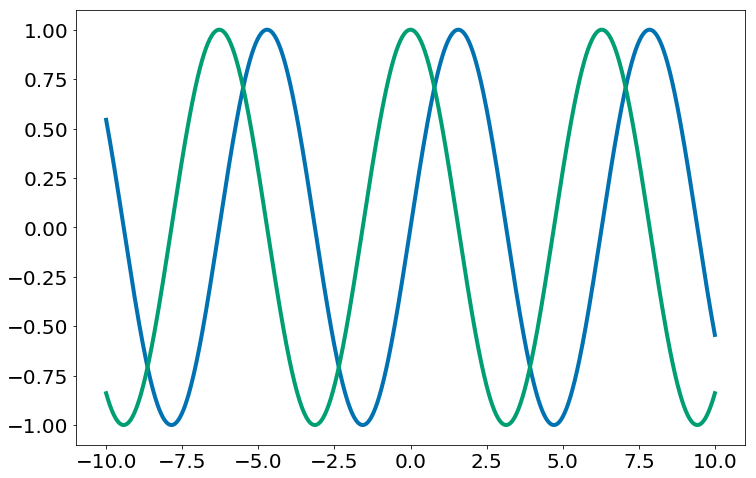

In [37]:
x = np.linspace(-10, 10, 1000)
x_nd = nd.array(x)
x_nd.attach_grad()
with mx.autograd.record(): # liga o modo treino, vamos derivar e otimizar coisas.
    y = nd.sin(x_nd)
y.backward()

plt.plot(x_nd.asnumpy(), y.asnumpy(), label='sin(x)')
plt.plot(x_nd.asnumpy(), x_nd.grad.asnumpy(), label='sin\'(x)')

O resultado é a mesma curva da função cosseno! Para entender melhor o autograd, leia a seção respectiva do [d2l.ai](http://d2l.ai/chapter_crashcourse/autograd.html).

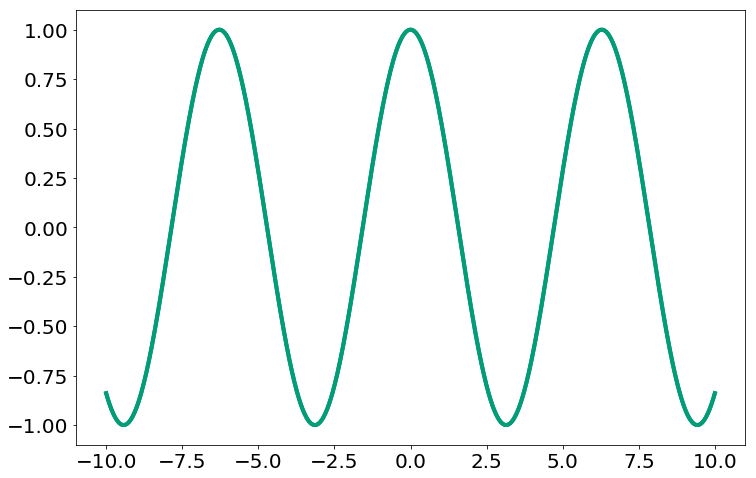

In [38]:
plt.plot(x_nd.asnumpy(), x_nd.grad.asnumpy(), label='sin\'(x)')
plt.plot(x_nd.asnumpy(), nd.cos(x_nd).asnumpy(), label='cos(x)')

6. Derive a função logística usando mxnet.

$$f(x) = \frac{1}{1 + e^{-x}}$$

In [39]:
x = np.linspace(-10, 10, 1000) # Não mude o valor de x!
x_nd = nd.array(x)
x_nd.attach_grad()
with mx.autograd.record():
    y = 1.0 / (1.0 + nd.exp(-x_nd))
y.backward()

In [40]:
y_test = 1.0/(1 + np.exp(-x))
derivada_teste = y_test * (1 - y_test)
assert_array_almost_equal(derivada_teste, x_nd.grad.asnumpy(), decimal=3)

A operação *dettach* permite quebrar a computação em várias partes. Em particular, isto é útil para aplicar a regra da cadeia. Suponha que $u = f(x)$ e $z = g(u)$, pela regra da cadeia, temos $\frac{dz}{dx}$ = $\frac{dz}{du}\frac{du}{dx}$. Para calcular $\frac{dz}{du}$, podemos primeiro separar $u$ da computação e, em seguida, chamar `z.backward()` para calcular o primeiro termo.

Observe no caso abaixo como derivamos $u = x^2$. A resposta deve ser $2x$ para cada termo `[0, 1, 2, 3]`.

In [41]:
x = nd.arange(4)
x.attach_grad()
with mx.autograd.record():
    u = x * x
u.backward()
x.grad


[ 0.  2.  4.  6.]
<NDArray 4 @cpu(0)>

Agora vamos fazer $z = u^3$ e computar as derivadas intermediarias.

In [42]:
x = nd.arange(4)
x.attach_grad()
with mx.autograd.record():
    u = x * x
    v = u.detach()  # u still keeps the computation graph
    v.attach_grad()
    z = v * v * v
u.backward()
x.grad


[ 0.  2.  4.  6.]
<NDArray 4 @cpu(0)>

Acima temos a derivada de x ao quadrado. Abaixo temos a derivada de g(x^2).

In [43]:
z.backward()
v.grad


[   0.    3.   48.  243.]
<NDArray 4 @cpu(0)>

7. Agora, sendo $f(x) = 1 + x^2$ e $g(x) = 1 + 7 x^9$. Vamos aplicar a regra da cadeia em mxnet.

In [44]:
x = nd.arange(4)
x.attach_grad()
with mx.autograd.record():
    u = 1 + x * x
    v = u.detach()  # u still keeps the computation graph
    v.attach_grad()
    z = 1 + 7 * nd.power(v, 9)
u.backward()

In [45]:
# teste para x
assert_array_almost_equal([0, 2, 4, 6], x.grad.asnumpy())

In [46]:
z.backward()

In [47]:
# teste para gx
expected = np.array([6.3000000e+01, 1.6128000e+04, 2.4609376e+07, 6.300000256000e+09])
assert_array_almost_equal(expected, v.grad.asnumpy(), 12)

## Conjunto de Problemas 4: Perceptron from Scratch

Por fim, vamos implementar o algoritmo de Perceptron usando mxnet. Inicialmente, vamos gerar dois blobs linearmente separáveis. Com um seed bem setado, claramente teremos duas classes abaixo.

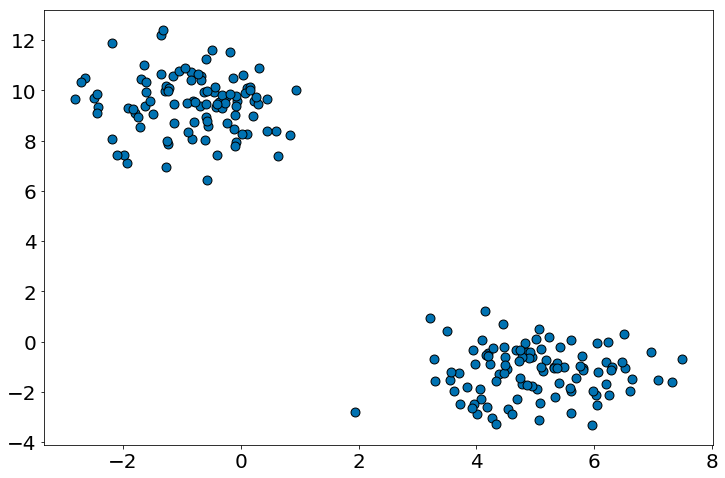

In [48]:
from sklearn import datasets
state = np.random.seed(20190187)

X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], s=80, edgecolors='k')

8. Converta X e y para array mxnet

In [49]:
X = nd.array(X)
y = nd.array(y)

Para realizar as nossas previsões, precisamos aplicar a seguinte função:

$$\hat{y}_i = \frac{1}{1 + e^{-(1 + \theta_1 x_{i1} + \theta_1 x_{i2}) + \cdots}}$$

Aqui $\hat{y}_i$ é a previsão de um único elemento. Podemos gerar uma matriz de previsões usando a forma matricial abaixo.

![](./figs/linear.png)

9. Sabendo que precisamos de uma coluna de valores 1 na nossa entrada $\mathbf{X}$, implemente uma função chamada `add_intercept` que adicionar uma nova coluna em X. A mesma deve retornar uma cópia! Não altere a matriz original.

In [50]:
def add_intercept(X):
    Xn = nd.zeros(shape=(X.shape[0], X.shape[1] + 1))
    Xn[:, 0]= 1
    Xn[:, 1:] = X
    return Xn

In [51]:
# testes, não apague!
X_teste = nd.zeros(shape=(4, 4))
X_novo_teste = add_intercept(X_teste)
X_novo_teste = X_novo_teste.asnumpy()
assert_equal(X_teste.shape[0], X_novo_teste.shape[0])
assert_equal(X_teste.shape[1] + 1, X_novo_teste.shape[1])
assert_array_almost_equal(np.ones(X_novo_teste.shape[0]), X_novo_teste[:, 0])

10. Implemente uma função activation que faz uso da sigmoid. A mesma deve retornar um vetor de previsões para um X de entrada. Como regra, assuma que quando a ativação tem valor maior do que 0.5 vamos prever a classe 1. Então, sua resposta deve ser um vetoe de 0s e 1s apenas. Não use nenhum laço!!

In [52]:
def activation(X, theta, limiar=0.5):
    return 1.0 / (1 + nd.exp(-nd.dot(X, theta)))

In [53]:
# testes, não apague!
X_teste = nd.random.normal(shape=(1000, 20000))
theta = nd.random.normal(shape=(20000))
y_hat_teste = activation(X_teste, theta)
assert_equal(True, (y_hat_teste >= 0).asnumpy().all())
assert_equal(True, (y_hat_teste <= 1).asnumpy().all())

11. Por fim, implemente agora o algoritmo do perceptron. O mesmo deve retornar um vetor de parâmetros theta. Execute o mesmo em X (com ou sem intercepto, no nosso exemplo simples não importa muito).

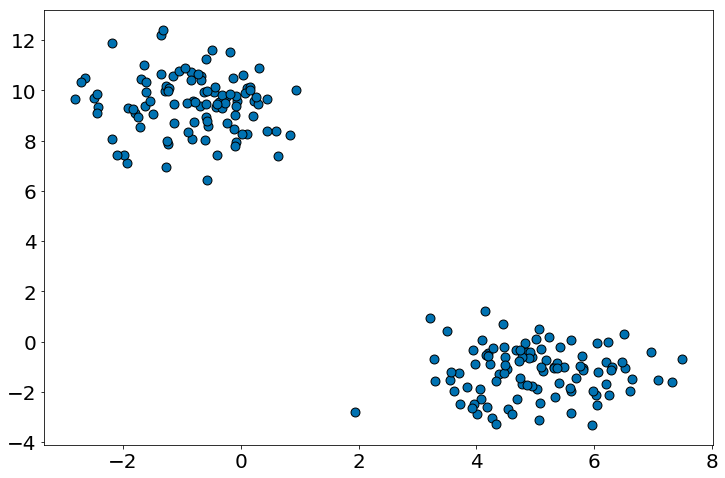

In [54]:
state = np.random.seed(20190187)
X, y = datasets.make_blobs(n_samples=200, n_features=2, centers=2)
plt.scatter(X[:, 0], X[:, 1], s=80, edgecolors='k')

X = nd.array(X)
y = nd.array(y)

In [55]:
def perceptron(X, y, rate=0.001):
    Xn = add_intercept(X)
    theta = nd.zeros(shape=Xn.shape[1])
    for _ in range(100):
        for i in range(X.shape[0]):
            Xi = Xn[i]
            yt = y[i]
            yp = activation(Xi, theta) > 0.5
            theta += rate * (yt - yp) * Xi
    print(theta)
    return theta
theta = perceptron(X, y)


[ 0.         -0.00486502  0.01179779]
<NDArray 3 @cpu(0)>


Seu perceptron deve prever perfeitamente as classes!

In [56]:
Xn = add_intercept(X)
y_p = activation(Xn, theta) > 0.5
print(y == y_p) # deve ser tudo 1!


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]
<NDArray 200 @cpu(0)>
